
Running ml_xgb


C:\Users\Daniel.LAPTOP-OBVONK0N\Anaconda2\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Daniel.LAPTOP-OBVONK0N\Anaconda2\lib\site-packages\stockstats.py:387: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: np.fabs(x - x.mean()).mean())


                           price      prob  w
date                                         
2019-04-17 18:50:00  5203.185617  0.636438  1
2019-04-17 18:55:00  5203.185617  0.549265  1
2019-04-17 19:00:00  5200.000000  0.671676  1
2019-04-17 19:05:00  5205.000000  0.647354  1
2019-04-17 19:10:00  5205.327958  0.647354  1
precision_score:0.64465408805
f1_score:0.682196339434
Compró y vendió un total de 36 y 35 veces, respectivamente

	USDT_BTC

Retorno del mercacdo: 2.8955541361
Retorno ml_xgb 3.29305406334


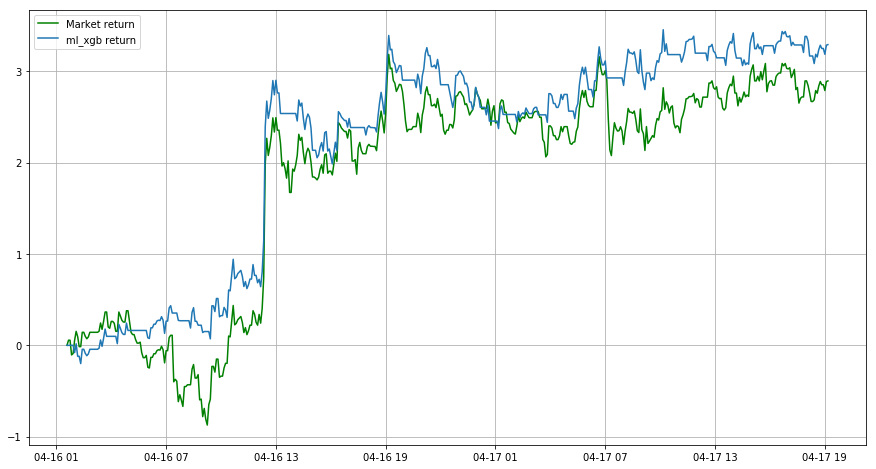

In [1]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy, makeVolatility
import numpy as np
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="USDT_BTC"

# 2019-03-14 01:36:19
#start=string2ts("2018-08-15 02:00:00")
#end=string2ts("2018-08-18 02:00:00")
start=string2ts("2019-04-16 01:35:00")
end=string2ts("2019-04-17 19:10:00")
period=3600/12

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)

per = 0.95
cum_return1 = marketReturn(df["close"]) 

marketRet = marketReturn(df["close"])[-1]*100 

# calculando volatilidad en función del tamaño de las velas
df["volatility"] = makeVolatility(df,c=1.7)

from profit import profit,profit2

start2 = ml_init_time(end,start,per)

df12 = prepareData(pair=pair, start=start2, end=end, period=period)

# "ml_stacking",
# "ml_randfor", "ml_xgb",
#strategies = ["ml_xgb2", "ml_randfor", "ml_stacking", "ml_mlpc", "ml_logreg"]
strategies = ["ml_xgb"]
list_profit = []
list_v = []
ws = []


for strategy in strategies:
    
    print "\nRunning",strategy
    w, t = run_strategy(strategy, df12, pair, True, per, count=2, la=11, prob=0.1)
    relativeReturn,v = profit2(w)
    
    ws.append(w)
    list_profit.append(relativeReturn)
    list_v.append(v)

    
print "\n\t%s\n"%pair
print 'Retorno del mercacdo: %s'%(marketRet)
for i, strategy in enumerate(strategies):
    print "Retorno", strategy, list_profit[i]*100

plt.plot(df.index[:],cum_return1*100,'g', label='Market return')
for i, strategy in enumerate(strategies):
    
    plt.plot(df12.index[int(len(df12)*per):],list_v[i]*100,label=strategy+' return')

plt.legend(loc='best')
plt.grid()

In [2]:
ws[0][["w"]].head()

,w
date,
2019-04-16 01:35:00,0
2019-04-16 01:40:00,0
2019-04-16 01:45:00,0
2019-04-16 01:50:00,0
2019-04-16 01:55:00,0


In [3]:
for la in range(3, 20):
    print "la:", la
    w, t = run_strategy("ml_xgb", df12, pair, True, per, la=la, prob=0.1)
    relativeReturn,v = profit(w)
    print relativeReturn*100

la: 3
                           price      prob  w
date                                         
2019-04-17 18:50:00  5203.185617  0.362246  0
2019-04-17 18:55:00  5203.185617  0.249746  0
2019-04-17 19:00:00  5200.000000  0.628723  1
2019-04-17 19:05:00  5205.000000  0.777951  1
2019-04-17 19:10:00  5205.327958  0.625842  1
precision_score:0.621527777778
f1_score:0.626970227671
12.4661323808
la: 4
                           price      prob  w
date                                         
2019-04-17 18:50:00  5203.185617  0.428048  1
2019-04-17 18:55:00  5203.185617  0.181557  0
2019-04-17 19:00:00  5200.000000  0.688738  1
2019-04-17 19:05:00  5205.000000  0.797737  1
2019-04-17 19:10:00  5205.327958  0.676473  1
precision_score:0.636363636364
f1_score:0.651724137931
13.8873174432
la: 5
                           price      prob  w
date                                         
2019-04-17 18:50:00  5203.185617  0.581990  1
2019-04-17 18:55:00  5203.185617  0.369525  0
2019-04-17 19:00

In [4]:
len(df12)

9981